# Dask array

Permet de manipuler des tableau multi-dimensionnels.

Ce code créé une vecteur de 100 000 éléments et change sa forme (reshape) vers une matrice de 200 lignes et 500 colonnes.

In [6]:
import numpy as np
import dask.array as da

data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))
a

dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

On voit que dask a subdivisé en interne la matrice en 10 morceaux sur 2 lignes et 5 colonnes, donnant ainsi une matrice de chunks (ou de morceaux) de taille 2x5

In [7]:
a.chunks

((100, 100), (100, 100, 100, 100, 100))

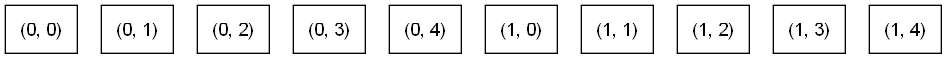

In [8]:
a.visualize()

Le premier morceau (0, 0) contient les 100 premières lignes et les 100 première colonnes.

In [9]:
a.blocks[0, 0]

dask.array<blocks, shape=(100, 100), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [10]:
a.blocks[1, 3]

dask.array<blocks, shape=(100, 100), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

## Indexation et accès aux données

API similaire au slicing Python, Numpy et DataFrame de Pandas.

In [11]:
a[:50, 200]

dask.array<getitem, shape=(50,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [14]:
a[-1, -1]

dask.array<getitem, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

In [13]:
a[-1, -1].compute()

np.int64(99999)

## Méthodes et API

Similiare à Numpy et DataFrame de Pandas. Toujours ne pas oublier de faire un compute() pour obtenir le résultat final. Le chaînage de méthode est possible.

In [16]:
m = a.mean()
m

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [17]:
m.compute()

np.float64(49999.5)

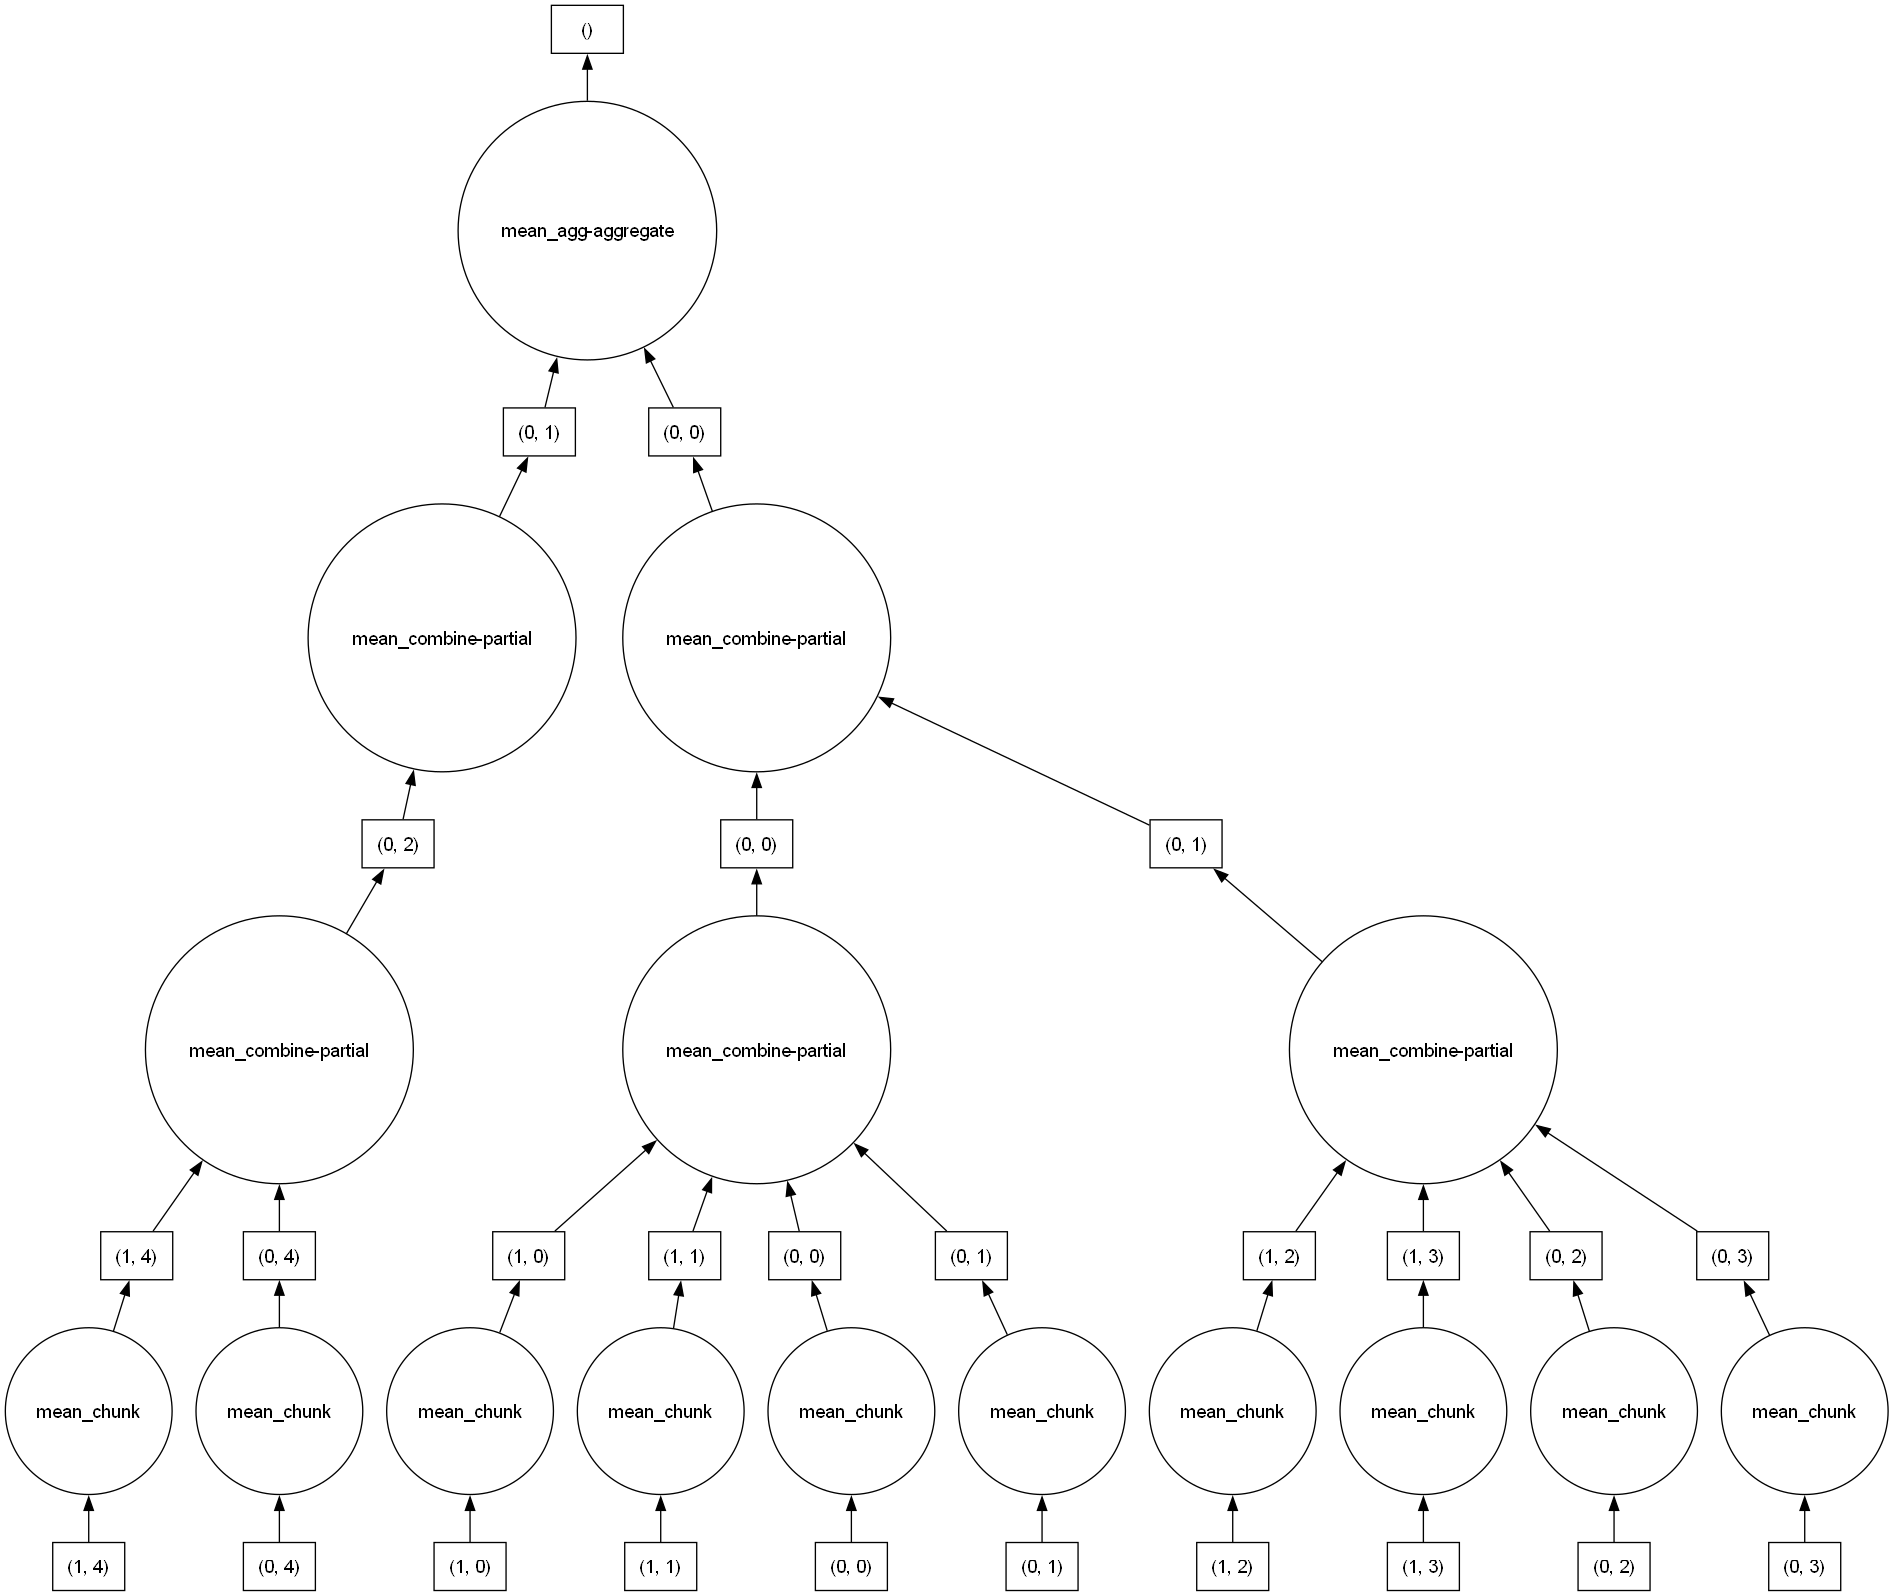

In [18]:
m.visualize()

In [19]:
s = np.sin(a)
s

dask.array<sin, shape=(200, 500), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [20]:
s.compute()

array([[ 0.        ,  0.84147098,  0.90929743, ...,  0.58781939,
         0.99834363,  0.49099533],
       [-0.46777181, -0.9964717 , -0.60902011, ..., -0.89796748,
        -0.85547315, -0.02646075],
       [ 0.82687954,  0.9199906 ,  0.16726654, ...,  0.99951642,
         0.51387502, -0.4442207 ],
       ...,
       [-0.99720859, -0.47596473,  0.48287891, ..., -0.76284376,
         0.13191447,  0.90539115],
       [ 0.84645538,  0.00929244, -0.83641393, ...,  0.37178568,
        -0.5802765 , -0.99883514],
       [-0.49906936,  0.45953849,  0.99564877, ...,  0.10563876,
         0.89383946,  0.86024828]], shape=(200, 500))

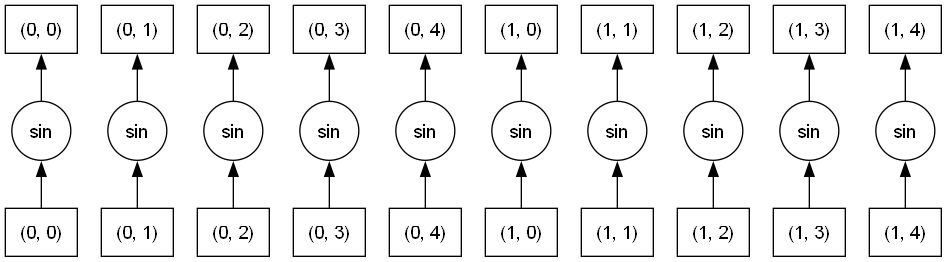

In [21]:
s.visualize()

In [22]:
a.T.compute()

array([[    0,   500,  1000, ..., 98500, 99000, 99500],
       [    1,   501,  1001, ..., 98501, 99001, 99501],
       [    2,   502,  1002, ..., 98502, 99002, 99502],
       ...,
       [  497,   997,  1497, ..., 98997, 99497, 99997],
       [  498,   998,  1498, ..., 98998, 99498, 99998],
       [  499,   999,  1499, ..., 98999, 99499, 99999]], shape=(500, 200))

In [ ]:
b = a.max(axis=1)[::-1] + 10
b

dask.array<add, shape=(500,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

In [44]:
b.compute()

array([100009,  99509,  99009,  98509,  98009,  97509,  97009,  96509,
        96009,  95509,  95009,  94509,  94009,  93509,  93009,  92509,
        92009,  91509,  91009,  90509,  90009,  89509,  89009,  88509,
        88009,  87509,  87009,  86509,  86009,  85509,  85009,  84509,
        84009,  83509,  83009,  82509,  82009,  81509,  81009,  80509,
        80009,  79509,  79009,  78509,  78009,  77509,  77009,  76509,
        76009,  75509,  75009,  74509,  74009,  73509,  73009,  72509,
        72009,  71509,  71009,  70509,  70009,  69509,  69009,  68509,
        68009,  67509,  67009,  66509,  66009,  65509,  65009,  64509,
        64009,  63509,  63009,  62509,  62009,  61509,  61009,  60509,
        60009,  59509,  59009,  58509,  58009,  57509,  57009,  56509,
        56009,  55509,  55009,  54509,  54009,  53509,  53009,  52509,
        52009,  51509,  51009,  50509,  50009,  49509,  49009,  48509,
        48009,  47509,  47009,  46509,  46009,  45509,  45009,  44509,
      

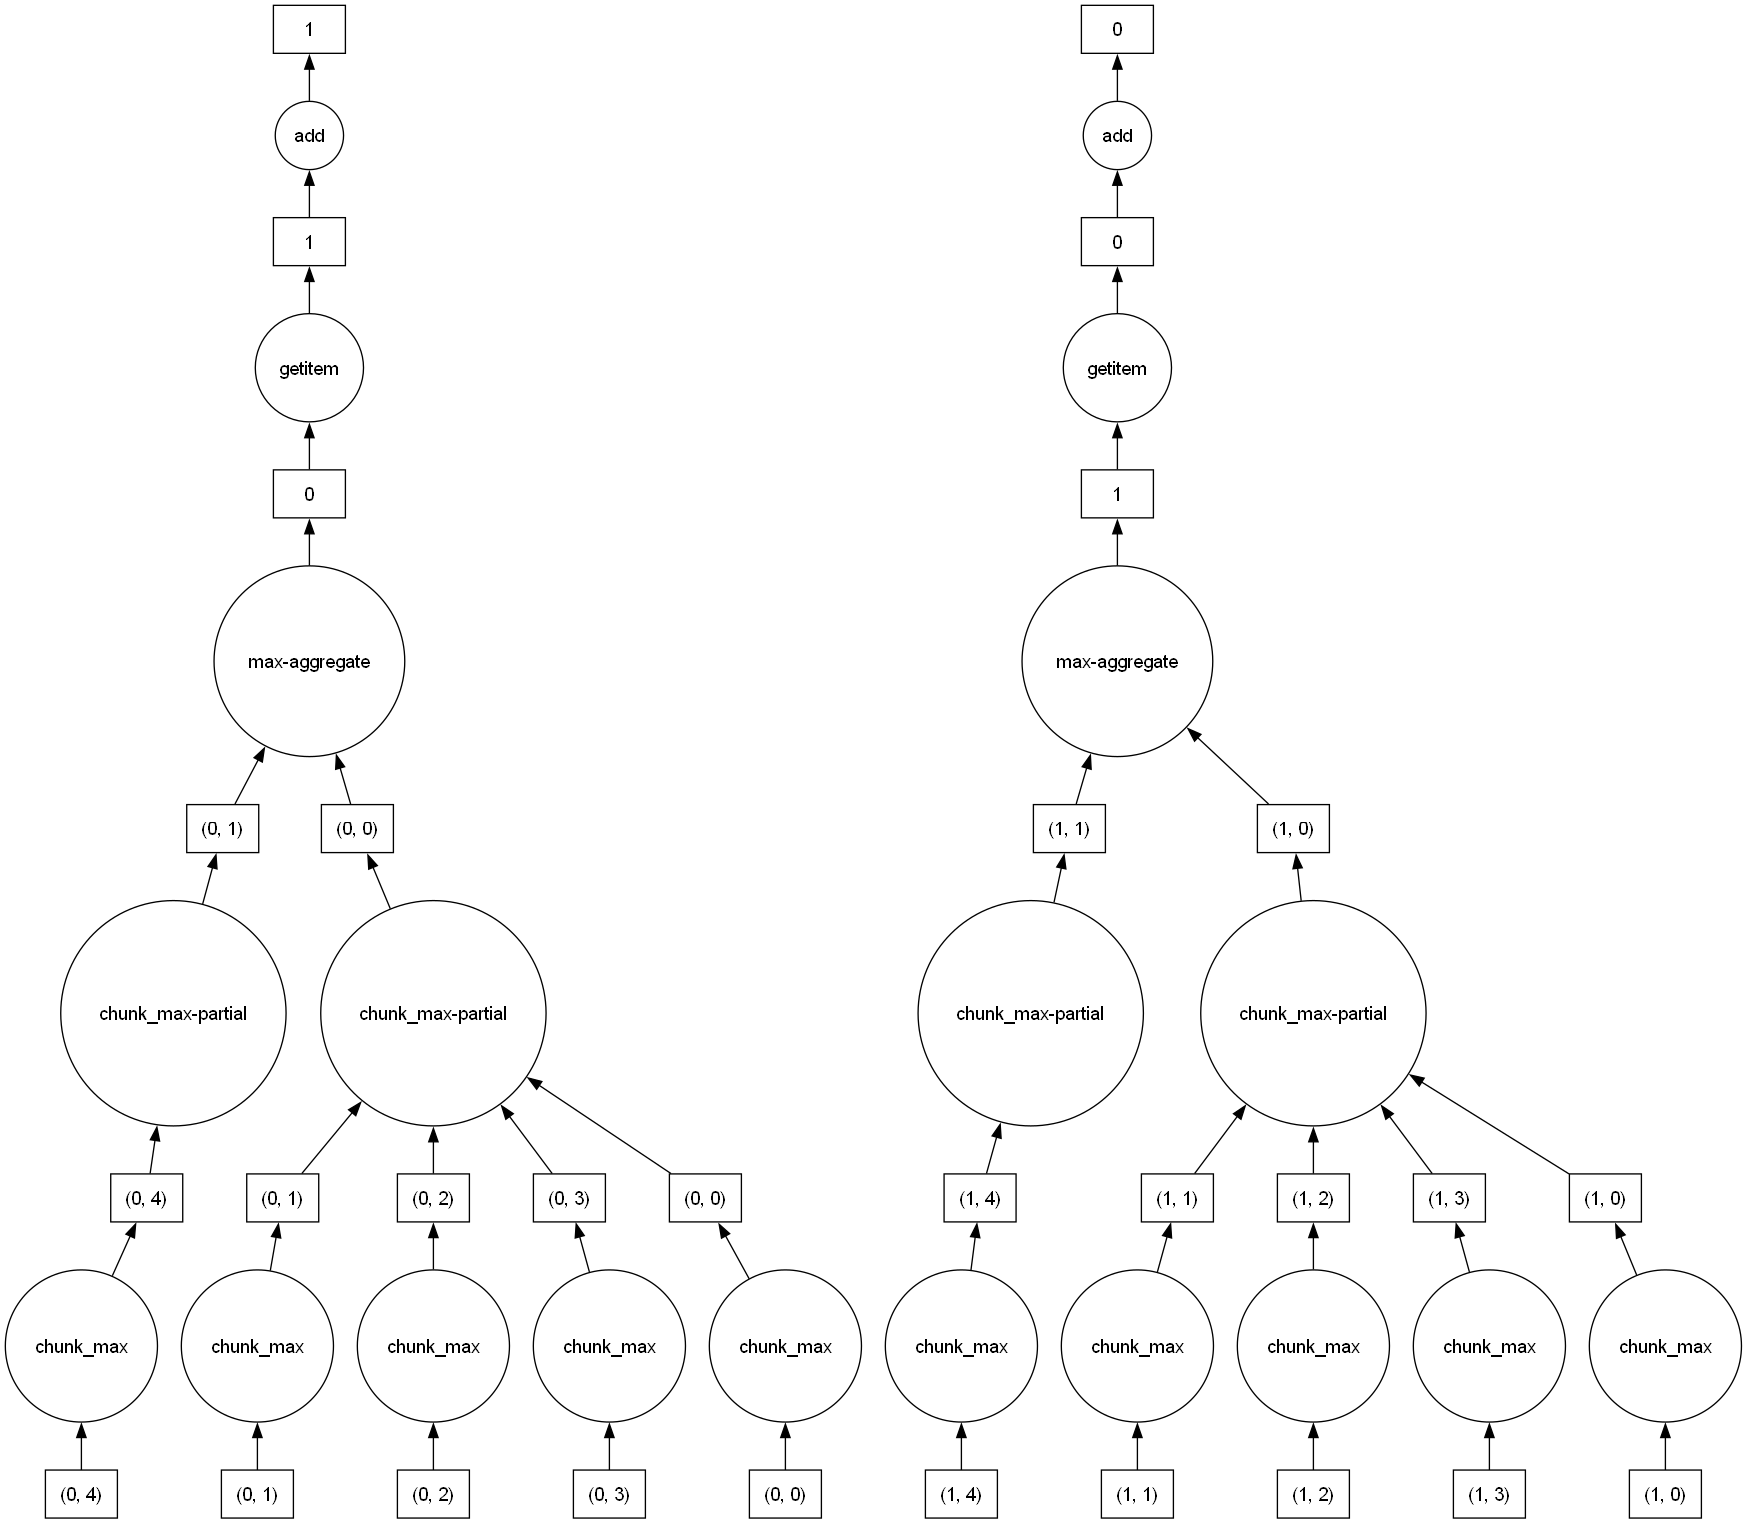

In [26]:
b.visualize()

Ceci permet de comprendre le calcul fait plus haut.

In [47]:
a.max(axis=1).compute()

array([  499,   999,  1499,  1999,  2499,  2999,  3499,  3999,  4499,
        4999,  5499,  5999,  6499,  6999,  7499,  7999,  8499,  8999,
        9499,  9999, 10499, 10999, 11499, 11999, 12499, 12999, 13499,
       13999, 14499, 14999, 15499, 15999, 16499, 16999, 17499, 17999,
       18499, 18999, 19499, 19999, 20499, 20999, 21499, 21999, 22499,
       22999, 23499, 23999, 24499, 24999, 25499, 25999, 26499, 26999,
       27499, 27999, 28499, 28999, 29499, 29999, 30499, 30999, 31499,
       31999, 32499, 32999, 33499, 33999, 34499, 34999, 35499, 35999,
       36499, 36999, 37499, 37999, 38499, 38999, 39499, 39999, 40499,
       40999, 41499, 41999, 42499, 42999, 43499, 43999, 44499, 44999,
       45499, 45999, 46499, 46999, 47499, 47999, 48499, 48999, 49499,
       49999, 50499, 50999, 51499, 51999, 52499, 52999, 53499, 53999,
       54499, 54999, 55499, 55999, 56499, 56999, 57499, 57999, 58499,
       58999, 59499, 59999, 60499, 60999, 61499, 61999, 62499, 62999,
       63499, 63999,

### Petit apparté sur les slices

In [38]:
l = list(range(1, 20))
l[::]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [39]:
# l[indice de début: indice de fin (optionnel = dernier indice selon le sens):pas (optionnel = 1)]
l[:]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [40]:
l[::-1]

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [41]:
l[3:1:-1]

[4, 3]

In [42]:
l[15:2:-3]

[16, 13, 10, 7, 4]